In [70]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

n_range = [536, 533, 530, 534, 535]
N = len(n_range)
    
SXM_PATH = ["electromigration_14/Image_{0:03}.sxm".format(i) for i in n_range] #Replace value as appropriate
base_filename = "electromigration_14_{0:03}-{1:03}_STP".format(n_range[0],n_range[-1])
#SXM_PATH = "electromigration_8/Image_001.sxm"
OUTPUT = "./molecule_density_data/"

import matplotlib as mpl 
import matplotlib.pyplot as plt

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import os
from ntpath import basename

import pims
import pySPM as spm 
import trackpy as tp
import glob
import scipy.misc
from scipy import ndimage

#@pims.pipeline
#def gray(image):
#    return image[:, :, 1]  # Take just the green channel
#frames = gray(pims.open('../track_molecules/*.bmp'))

class SXMReader(pims.FramesSequence):
    def __init__(self, filename_pattern):
        #self.filenames = glob.glob(filename_pattern)
        self.filenames = filename_pattern
        self.scans = [spm.SXM(filename) for filename in self.filenames]
        self.V_data = -np.array([s.get_channel("Bias").pixels for s in self.scans]) #grab z-channel
        #min_V = np.min(self.V_data)
        #max_V = np.max(self.V_data)
        #self.V_data -= min_V
        #self.V_data /= max_V-min_V
        self._len = len(self.V_data)
        self._dtype = self.V_data.dtype
        self._frame_shape = self.V_data[0].shape
        self.scan_size = self.scans[0].size
        self.meters_per_pixel = self.scan_size['real']['x']/self.scan_size['pixels']['x']
       
    def get_frame(self, i):
        # Access the data you need and get it into a numpy array.
        # Then return a Frame like so:
        return pims.Frame(self.V_data[i], frame_no=i)

    def __len__(self):
        return self._len

    @property
    def frame_shape(self):
        return self._frame_shape

    @property
    def pixel_type(self):
        return self._dtype
    
frames = SXMReader(SXM_PATH)
frames=frames[::1]

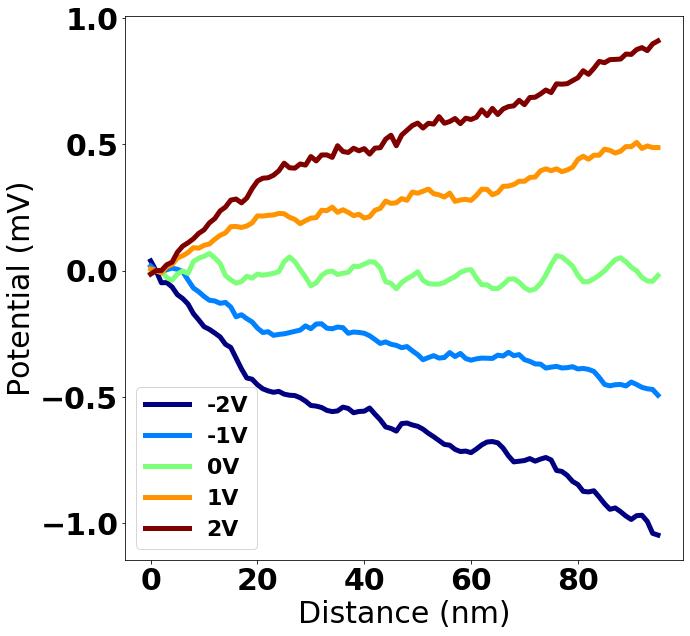

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
mpl.rcParams.update({'font.size': 40})
mpl.rcParams.update({'text.usetex': False})
font = {'size'   : 22}
mpl.rc('font', **font)
voltage=[-2,-1,0,1,2]
colors = [plt.cm.jet(x) for x in np.linspace(0, 1, N)]
for i in range(N):
    ax.plot((np.mean(frames[i],0)-np.mean(frames[i][:,1]))*1000, color =colors[i], label= "{:.0f}V".format(voltage[i]), linewidth=5)
ax.legend(loc='lower left',fontsize='medium')
plt.yticks(np.arange(-1, 1.1, step=0.5), fontsize=30) 
plt.xticks(fontsize=30)
plt.xlabel('Distance (nm)',fontsize=30)
plt.ylabel('Potential (mV)',fontsize=30)
plt.savefig(os.path.join(OUTPUT,base_filename), bbox_inches='tight')

In [38]:
import matplotlib as mpl

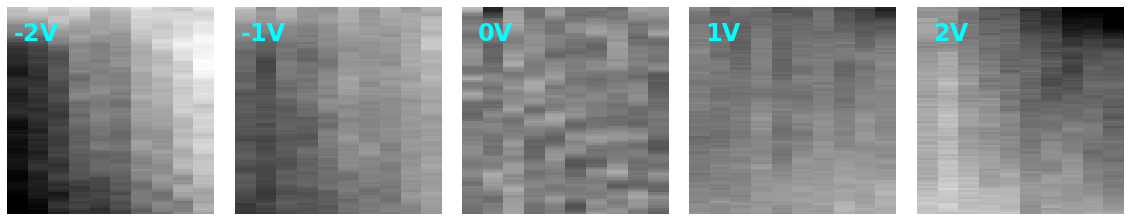

In [72]:
## Output matrix of images to ./output/electromigration_8_{0:03}-{1:03}_tiled.png
x, y = 1, N
#V = np.arange(0,10*N,10)
#V = np.arange(60,-70,-10)
#V=[0,3,3,3,10,10,10,10,20,20,20,20,20,20,40,40,40,40,40,40,40]
V=[-2,-1,0,1,2]
#T=["0s", "100us", "1ms", "10ms", "100ms", "1s", "10s", "100s"]
# V=np.cumsum(V)
#for i, f in enumerate(frames.filenames):
mpl.rc('figure',  figsize=(20, 20))
fig, ax = plt.subplots(1,N)
plt.subplots_adjust(wspace=0.1, hspace=0.05) #for 25 images (wspace=-0.8, hspace=0.05) #wspace=-0.69, hspace=0.01 #wspace=-0.1, hspace=0.01
for i in range(y):
        if i < N:
            c_center=np.mean(frames[i])
            ax[i].imshow(np.rot90(frames[i]), clim=[c_center-0.001,c_center+0.001])
            ax[i].text(2,80, "{}V".format(V[i]), ha="right", weight='bold', color="cyan", fontsize =24)
            #ax[i,j].text(120,110, T[k], ha="right", weight='bold', color="yellow", fontsize =14)
        ax[i].invert_yaxis()
        ax[i].axis('off')
        ax[i].set_aspect(1/9.6)
        
base_filename="electromigration_14_{0:03}-{1:03}_STP_tiled".format(n_range[0],n_range[-1])
plt.savefig(os.path.join(OUTPUT,base_filename), bbox_inches='tight')

In [198]:
mpl.cm.get_cmap()

In [9]:
np.ones(N)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
im.save('out.gif', save_all=True, append_images=frames)